# STA 208: Homework 1 (Do not distribute)

## Due 4/12/19 midnight 

__Instructions:__ To make grading easier for the TAs please submit it on canvas in a zip file with either the scanned solutions clearly written or in the jupyter notebook below.  The zip file should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand and scanned.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (20 pts)

Consider the binary classification setting where the training data is $x_i \in \mathbb R^p, y_i \in \{0,1\}, i=1,\ldots,n$ and recall the empirical risk (as a function of the predictor $g : \mathbb R^p \to \{0,1\}$),
$$
R_n(g) = \frac 1n \sum_{i=1}^n \ell(y_i, g(x_i)),
$$
and the true risk is 
$$
R(g) = \mathbb E \ell(Y,g(X))
$$
where $X,Y$ are drawn from their joint distribution $f_{X,Y}(x,y)$.

1. Suppose that the loss function is the Hamming loss, $\ell(y,\hat y) = 1\{ y \ne \hat y\}$.  What is the predictor that minimizes the True risk?  (Hint: derive an expression for this based on the joint distribution - you can use expressions involving conditional probabilities.)  This predictor is called the Bayes rule.
2. Suppose that we know that the Bayes rule can be written in the form, 
$$
h(x) = 1\{ x_j > 0 \}, 
$$
for some $j = 1,\ldots,p$, but we don't know which one.  Now using the empirical risk, what is a reasonable classification algorithm (Hint: you can think of finding a good classifier as a problem of finding $j$).  Describe the fit and predict methods. 
3. (Challenging) Suppose that I told you that for any fixed $g$ the following probability bound holds (from Hoeffding's inequality)
$$
\mathbb P \left\{ |R_n(g) - R(g)| > t \right\} \le 2 \exp \left( - 2 n t^2 \right).
$$
If $p=10$, how many samples would I need to get a classifier $\hat g$, from the previous question, such that 
$$
\mathbb P \left\{ R(\hat g) < R(h) + 0.1 \right\} \ge 0.95.
$$
(Hint: use the union bound)

<p  style="background-color:rgb(0,185,185)">
    ========================================================================================================================
</p>
<h3><font color="blue">Answer 1</font></h3>
<h4><font color="blue">Answer 1.1</font></h4>
<p>
    Since we have the true risk:
\begin{equation}
      E[R(g)]
    = E_{X,Y}[\ell(Y,g(X))]
    = E_{X,Y}[\mathbf{1}\{Y\neq g(X)\}]
    = E_X[E_{Y|X}[\mathbf{1}\{Y\neq g(X)\}|X]].
\end{equation}
    To find $g$ to minimize the true risk $E[R(g)]$, we need to minimize $E_{Y|X}[\mathbf{1}\{Y\neq g(X)|X\}]$:
    \begin{align*}
      E_{Y|X}[\mathbf{1}\{Y\neq g(X)|X\}]
    =& P(Y\neq g(X)|X)\\
    =& P(g(X)=0)P(Y=1|X)+P(g(X)=1)P(Y=1|X)\\
    =& P(g(X)=0)P(Y=1|X)+(1-P(g(X)=0))(1-P(Y=1|X))
    \end{align*}
    To minimize $E_{Y|X}[\mathbf{1}\{Y\neq g(X)|X\}]$, the predictor $\hat{g}$ satisfies:
    \begin{align*}
    \hat{g}(x)&= \text{argmin}_{y\in\{0,1\}}\,[1-Pr(Y=y|X=x)],\\
    \end{align*}
    i.e. we need:
    \begin{gather} 
    \hat{g}(x)= \left\{
    \begin{array}{ll}
        0,\, \text{if}\,f_{X,Y}(x,0)\geq f_{X,Y}(x,1),\\
        1,\, \text{if}\,f_{X,Y}(x,0)< f_{X,Y}(x,1).\\
    \end{array} 
    \right. 
    \end{gather}
    Thus, we get the predictor $\hat{g}$ that minimize the error term.
    \begin{gather} 
    \hat{g}(x)= \left\{
    \begin{array}{ll}
        0,\, \text{if}\,f_{X,Y}(x,0)\geq \frac12,\\
        1,\, \text{if}\,f_{X,Y}(x,0)< \frac12.\\
    \end{array} 
    \right. 
    \end{gather}
<p>
 
 
<h4><font color="blue">Answer 1.2</font></h4>
<p>
    Assuming that $\hat{g}_k(x)=1\{x_k>0\}, \forall k\in \{1,2,3,\cdots, p\}$, i.e.:
    \begin{gather} 
    \hat{g}_k(x)= \left\{
    \begin{array}{ll}
        0,\, \text{if}\,x_k \leq 0,\\
        1,\, \text{if}\,x_k >0.\\
    \end{array} 
    \right. 
    \end{gather}
    For $h(x)=1\{x_j>0\}$, according to the problem there, we have $R(h)=
    \textstyle\min\limits_{g\in G} R(g)$. To estimate $R(h)$, we focus on $R_n(h)=\textstyle\min\limits_{k\in \{1,\cdots, p\}} R_n(\hat{g}_k)$. Since we know that $h\in \{\hat{g}_1,\hat{g}_2,\cdots,\hat{g}_p\}$. The strategy is that we find the $\hat{g}_h$ which minimizes $R_n(\hat{g}_k)$, and then we just let $h=\hat{g}_h$.
<p>



<h4><font color="blue">Answer 1.3</font></h4>
<p>
    Since $R_n(\hat g)-R_n(h)\leq 0$.
    \begin{align*}
    &R(\hat g)< R(h)+0.1\\
    \Longleftrightarrow& R(\hat g)- R(h)<0.1\\
    \Longleftrightarrow& R(\hat g)- R_n(\hat g)+R_n(\hat g)-R_n(h)+R_n(h)-R(h)<0.1          \\        
    \Longleftarrow& R(\hat g)- R_n(\hat g)+R_n(h)-R(h)<0.1 \\
    \end{align*}
    Suggest that controlling $|R_n(\hat{g})-R(\hat{g})|\leq 0.05,$ $ 
    |R_n(h)-R(h)|\leq 0.05$ will be sufficient.
</p>
<p>
    Since $g,h\in \{\hat{g}_1,\hat{g}_2,\cdots,\hat{g}_p\}$, if we control all that 
    $|R(\hat {g }_k)- R_n(\hat {g}_k)|\leq 0.05,$ $\forall k \in \{1,2,3,\cdots,p\},$ we will get$|R_n(\hat{g})-R(\hat{g})|\leq 0.05,$ $|R_n(h)-R(h)|\leq 0.05$
</p>
<p>
    Therefore, $P(|R_n(\hat{g}_k)-R(\hat{g}_k)|\leq 0.05,\forall k\in\{1,2,\cdots,p\})\geq 0.95$ is sufficient. And we can use $P(|R_n(\hat{g}_k)-R(\hat{g}_k)|\geq 0.05)\leq 2\exp (-2n\times 0.05^2),$ $\forall k=1,2,3,\cdots,p$ to construct this union bound.
</p>
<p>    
    Define $A_k=\{|R_n(\hat{g}_k)-R(\hat{g}_k)|\leq 0.05\}$, we want to control $P(\cap_{k=1}^p A_k)\geq 0.95$. Thus
    \begin{align*}
    P(\cap_{k=1}^p A_k)= & 1-P(\cup_{k=1}^p A_k^C)\\
               \geq & 1-\sum_{k=1}^p P(A_k^C)\\
               \geq & 1-2p\exp(-2n\times 0.05^2)\\
               = & 1-20\exp(-2n\times 0.05^2)\geq 0.95.
    \end{align*}
    Therefore, we need $n\geq 1198.293$, i.e. we need $1199$ samples here to guarantee the accuracy.
</p>
<p  style="background-color:rgb(0,185,185)">
    ========================================================================================================================
</p>

__Exercise 2__ (20 pts)

Consider the regression setting in which $x_i \in \mathbb R^p$ and $y_i \in \mathbb R$, for $i=1,\ldots,n$ and $p < n$.

1. For a given regressor, let $\hat y_i$ be prediction given $x_i$, and $\hat y$ be the vector form.  Show that both linear regression and k-nearest neighbors can be written in the form
$$
\hat y = H y,
$$
where $H$ is dependent on $X$ (the matrix of where each row is $x_i$).  Give a clear expression for $H$.  Assume that the KNN algorithm will use the same point as its own nearest neighbor (this is consistent with what you get if you use the same dataset in fit and predict in sklearn.)
2. By modifying the matrix $H$, how can we ensure that a given sample is not used as a k nearest neighbor.  Derive an expression for the leave-one-out cross validated square error based on this.
3. For linear regression (with $n < p$), let $X = U D V^\top$ be the singular value decomposition where $U$ is $n \times p$, and $V, D$ is $p \times p$ ($D$ is diagonal). Derive an expression for the OLS coefficients $\beta = A b$ such that $A$ is $p \times p$ and depends on $V$ and $D$, and $b$ is a $p$ vector and does not depend on $D$.  Describe a fit method that precomputes these quantities separately, and describe a predict method.
4. Consider a regressor that performs OLS using the SVD above, but every instance of D will only use the largest $r$ values on the diagonal.  Call this new $r \times r$ matrix $D_r$ ($r < p$), and let $U_r, V_r$ be the $n \times r$ and $r \times p$ matrices which are these restricted to the top $r$ eigenvectors.  Then the new coefficient vector is the OLS computed as if the design matrix is modified by $X \gets U_r D_r V_r^\top$.  Given that you have computed $b$ already, how could you make a method `change_rank` that recomputes $A$ with $D_r$ instead of $D$?  What is its computational complexity (it should not depend on n)?

<p  style="background-color:rgb(0,185,185)">
    ========================================================================================================================
</p>
<font color="Blue">
<h3>Answer 2</h3>

<h4>Answer 2.1</h4>
</font>
<p>
    For the linear regression:
    $$
    \hat \beta = (X^\top X)^{-1} X^\top y,
    $$
    where $X,y$ are $n \times p$ and $n$ arrays.
    $$
    (X^\top X) \hat \beta = X^\top y,
    $$
    $$H=X(X^\top X)^{-1} X^\top.$$
    For the kNN algorithm, 
    Given a metric (d), the K-nearest neighbors of $x$ in $x_1,\ldots,x_n$ is $x_{j_1},\ldots,x_{j_K}$ such that
$$
d(x,x_{j_1}) \le d(x,x_{j_2}) \le \ldots
$$
   Then the kNN-estimator:
    \begin{equation*}
    \hat{Y}_{knn}=\frac{Y_{j_1}+\cdots+Y_{j_k}}{k}.
    \end{equation*}
</p>


<font color="Blue"><h4>Answer 2.2</h4></font>
<p>
    Set the distance $d(x,x)= \infty,\forall x\in\{x_1,\cdots,x_n\}$. Then we choose $x_i$'s k nearest neighbors exclude itself. Denote their indices are $\{i_1,i_2,\cdots, i_k\}$, where $i\neq i_1,\cdots,i_k$. The estimator will be:
    $\hat Y=\frac1k \sum_{j=1}^k Y_{i_j}$.
    Then the squared error of a single observation x is:
    \begin{equation}
    \ell(Y,\hat Y)=\ell( Y, \hat Y )=(Y-\hat Y)^2.
    \end{equation}
    The leave one out cross validated error will be:
    \begin{equation}
    LOO(n)=\frac1n\sum_{i=1 }^n(Y_i-\hat Y_i)^2 .
    \end{equation}
</p>


<font color="Blue"><h4>Answer 2.3</h4></font>
<p>
    Since $U$ and $V$ satisfy the fact: $A^\top A=I_n$, and $D$ is a diagonal matrix:
    \begin{align}
        X^\top X 
    &=V D^\top U^\top U D V^\top\\
    &=V D^2 V^\top. \\
    \end{align}
    Because in OLS, we have $\hat\beta = (X^\top X)^{-1}X y $. Now, let 
    $A=V D^{-1}$ and $b=U^\top  y$ we have:
    \begin{align}
        \hat\beta
    &=(X^\top X)^{-1}X y\\
    &=V D^{-2} V^\top V D^\top U^\top  y\\
    &=V D^{-2} (V^\top V) D U^\top  y\\
    &=(V D^{-1}) (U^\top  y)\\
    &=Ab.
    \end{align}
    As for the prediction, $\hat y= X\hat \beta$.
</p>


<font color="Blue"><h4>Answer 2.4</h4></font>
<p>
    Assuming that $U=(U_1,U_2,\cdots, U_p), \, D=
    \begin{pmatrix}
    d_1&  0  &\cdots&0\\
    0  &d_2  &\cdots&0\\
    \vdots&\vdots&\ddots&\vdots\\
    0&0&\cdots&d_p\\
    \end{pmatrix}
    ,\, V=\begin{pmatrix}
    V_1^\top\\
    V_2^\top\\
    \vdots\\
    V_p^\top\\
    \end{pmatrix}$, where $d_1\geq d_2\geq d_3\geq \cdots \geq d_r$. 
    The SVD can be writen as $$
    X=U D V^\top={\textstyle\sum\limits_{k=1}^p} d_k \,U_k V_k^\top.
    $$
    $$
    \hat\beta=(V D^{-1}) (U^\top  y)= A\,b.
    $$
    Assuming $A=(A_1,A_2,\cdots, A_p), \, b=\begin{pmatrix}
    b_1\\
    b_2\\
    \vdots\\
    b_p\\
    \end{pmatrix}$.
    We can also have:$$
    \hat\beta={\textstyle\sum\limits_{k=1}^p} b_k \,A_k.
    $$
    The computational complexity to calculate A from V and D is $\mathcal{O}(p^2)$, because $A=V D^{-1}$,where $V$'s shape is $ p\times p $, and $D_r^{-1}$ is a $p\times p$ diagnal matrix.
</p>
<p>
    By choosing the top r eigenvectors, i.e the index $j \in\{1,2,3,\cdots,r\}$, we can get the $X_r$:
    \begin{align*}
    X_r&={\textstyle\sum\limits_{j=1}^r} d_{j} \,U_{j} V_{j}^\top.
    \end{align*}
    According to the previous problem, $A_r=V_r D_r^{-1}$ and $b_r=U_r^\top  y$.
    \begin{align*}
    \hat\beta_r&={\textstyle\sum\limits_{j=1}^r}   b_k \,A_k.
    \end{align*}
    The computational complexity is $\mathcal{O}(pr)$, because $A_r=V_r D_r^{-1}$,where $V_r$'s shape is $ p\times r $, and $D_r^{-1}$ is a $r\times r$ diagnal matrix.
</p>
<p  style="background-color:rgb(0,185,185)">
    ========================================================================================================================
</p>

__Exercise 3__ (30 pts)

We call the method that zeros out all but $r$ singular values in OLS, singular value regression.  Implement the singular value regressor as a sklearn style class below.  Test it by simulating the training and test data from the `gen_LR_data` function below and calculate the average square error on the test set.  Do this for each choice of `r` in the fit function.

In [1]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt
from sklearn import model_selection, linear_model, neighbors, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class SingularValueRegressor:
    """
    : A regression object that uses the SVD to fit and predict
    : Init: specify rank r
    : .fit: solve the SVD of X and precompute beta
    : .predict: Return y hat for X_test
    """
    
    def __init__(self,r):
        """
        : Store the rank
        """
        self.r = r
        
    def fit(self,X,y):
        """
        : Computes and stores the SVD (use scipy.linalg.svd)
        : Computes beta for rank r singular value regression
        """
        n,p=X.shape
        #---1.Compute the SVD  
        u,s,vh = svd(X)
        #---2.Store the SVD 
        self.u = u
        self.s = s
        self.vh = vh
        #---3.Store A and b, which are convenient for later computations.
        self.y=y
        self.A = vh.T @ np.diag(1/s) 
        self.b = u.T @ y
        Ar=self.A[:,:self.r]
        br=self.b[:self.r]
        self.beta =Ar @ br
        return self.beta
    
    def predict(self,X_test):
        """
        : Outputs the predicted y given the predictors X_test
        """
        self.y_pred= X_test @ self.beta
        return self.y_pred
        
    def change_rank(self,r):
        """
        : Assumes that the SVD has been computed and uses it to change the rank; after
        : running the new regressor object should be as if we fit with the new rank r
        """
        #---1.Store a new rank
        self.r=r
        #---2.Compute new A,b.
        Ar=self.A[:,:self.r] #Cut Ar out from A
        br=self.b[:self.r] #Cut br out from B
        self.beta = Ar @ br
        return self.beta #Get a return value to check how it works.
        

In [3]:
def gen_LR_data(r = 10, p = 20, n = 100):
    """
    : generate data from an approx low rank regression model
    """
    alpha = np.random.chisquare(1,size = (p,r)) #X coefficients
    Z = np.random.normal(size=(n,r)) #X covariates
    beta = np.random.normal(size = r) #reg covs
    mu = Z @ beta #hidden mean
    Xmean = Z @ alpha.T #random transformation of Z
    X = Xmean + np.random.normal(0,.5,size=(n,p)) #add noise - not exactly low rank
    X_test = Xmean + np.random.normal(0,.5,size=(n,p))
    y = mu + np.random.normal(0,1,size=(n))
    y_test = mu + np.random.normal(0,1,size=(n))
    return (X,y,X_test,y_test)

<p>If we take the intercept into consideration, the difference in mse will be less than 0.01, i.e. less than $1\%$ of the mse. Therefore, there is no need to add a column vector $\mathbb{1}$ to the design matrix in these problem. </p>

In [4]:
np.random.seed(5)#Use the 5th random sequence
X,y,X_test,y_test = gen_LR_data()

In [6]:
#Store the mse.
n,p=X.shape
mse=[]
y_pred={}
svr=SingularValueRegressor(1)
svr.fit(X,y)
for i in range(p):
    svr.change_rank(i+1) #change the rank into i
    y_pred[i+1]=svr.predict(X_test)
    mse.append(metrics.mean_squared_error(y_test,svr.predict(X_test)))

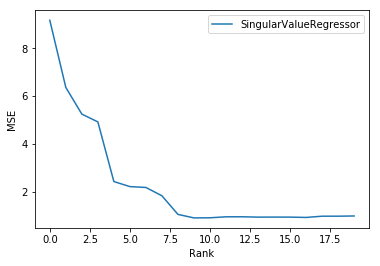

In [8]:
plt.plot(mse,label='SingularValueRegressor')
plt.xlabel('Rank')
plt.ylabel('MSE')
plt.legend()

__Exercise 4__ (30 pts)

The dataset in the hw1 directory has a Y variable, 7 predictor variables (X1 - X7).  Using sklearn and the class that you constructed above, compare ridge regression, OLS, kNN, and SVRegression.  Compare and tune the methods using appropriate testing procedures.  Comment on the tuning of each parameter in ridge, kNN, and SVRegression in markdown.  Be sure to standardize the X variables first and decide how to deal with NAs.  

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.linalg import svd
from sklearn import model_selection, linear_model, neighbors, preprocessing, metrics
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data_mat = pd.read_csv('hw1_data.csv')
data_mat.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


# 1.Dealing with missing values

In [13]:
#locate the missing values
data_mat[data_mat.isnull().values==True] 

,Y,X1,X2,X3,X4,X5,X6,X7
32,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0
126,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0
330,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0
336,23.6,4.0,140.0,NaN,2905.0,14.3,80.0,1.0
354,34.5,4.0,100.0,NaN,2320.0,15.8,81.0,2.0
374,23.0,4.0,151.0,NaN,3035.0,20.5,82.0,1.0


In [14]:
# fill the data with mean
dm=data_mat.fillna(data_mat.mean())

In [15]:
#get the design matrix and 
y=np.array(data_mat.Y)
X=np.array(dm)[:,1:]

In [22]:
#Scaling X ---standardize X
from sklearn import preprocessing as ppc
x=ppc.scale(X)

# 2. Risk Class (Including two method: 1.Empirical;2.Leave one out.)

In [16]:
class risk:
    def __init__(self,mod):
        """
        ---Preliminary: choosing a model from sklearn. 
        
        ---Attribute:
            mod:A Regression Model. 
                ---The model should have:
                   1. a method "fit" 
                   2. a method "predict": return a fitted value.
        """
        self.mod = mod
        
    def loo(self,X,y):
        """
        ---Goal: To get the leave-one-out lost.
        
        ---Preliminary: from sklearn.modele_selection import LeaveOneOut 
        
        ---Input: Design matrix X, Response y.
        ---Output: Mean of the leave-one-out loss.
        """
        loo = LeaveOneOut()
        loo_sq_err=[]
        for train_index, test_index in loo.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.mod.fit(X_train,y_train)
            y_hat = self.mod.predict(X_test)
            loss = np.sum((y_hat-y_test)**2)
            loo_sq_err.append(loss)
        return np.mean(loo_sq_err)
        
    def emp(self,X,y):
        """
        ---Goal: To calculate the empirical risk for square error loss.
        
        ---Input: Design matrix X, Response y.
        ---Output: Mean of the square error.
        """
        self.mod.fit(X,y)
        y_hat = self.mod.predict(X)
        return np.mean((y_hat-y)**2)

# 3. OLS

In [24]:
#Consider intercept in this situation
x_ols=np.hstack((np.ones((398,1)),x))

In [25]:
#OLS
OLS=linear_model.LinearRegression()
OLS.fit(x_ols,y)
risk_OLS=risk(OLS)
print("Empirical Risk is " + str(risk_OLS.emp(x_ols,y)))
print("Leave One Out Risk is " + str(risk_OLS.loo(x_ols,y)))

Empirical Risk is 10.913542248838684
Leave One Out Risk is 11.439466078111165


<p>Since for kNN leave one out risk is much better, we use Leave one out to compare all of the risks in each model.</p>

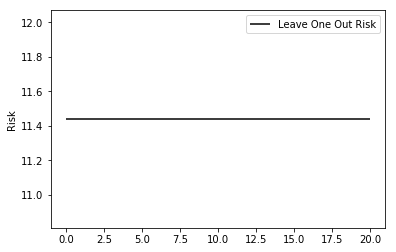

In [60]:
plt.hlines(risk_OLS.loo(x_ols,y),0,20,label="Leave One Out Risk")
plt.ylabel('Risk')
plt.legend()

# 4. Ridge

In [32]:
#store leave one out risk with different Alpha.
ridges_loo=[]
for k in np.arange(0,5.1,.1):
    Ridge=linear_model.Ridge(alpha=k)
    risk_Ridge=risk(Ridge)
    ridges_loo.append(risk_Ridge.loo(x,y))

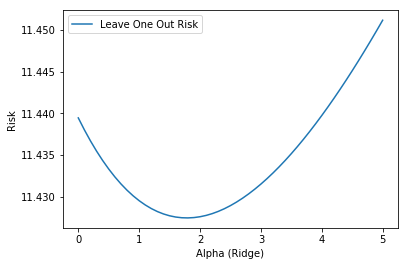

In [37]:
plt.plot(np.arange(0,5.1,0.1),ridges_loo,label="Leave One Out Risk")
plt.xlabel('Alpha (Ridge)')
plt.ylabel('Risk')
plt.legend()

# 5. kNN

In [41]:
#store the empirical and leave one out risk with different k in 2 lists.
knns_emp=[]
knns_loo=[]
for k in np.arange(1,16):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    risk_knn=risk(knn)
    knns_emp.append(risk_knn.emp(x,y))
    knns_loo.append(risk_knn.loo(x,y))

<p>
    The Reason we do not choose empirical risk mainly because when $k=1$, the fitted value is itself. And since k is not large enough, it is impossible to ignore the reduce of risk caused by including itself in the prediction. See the following graph:

</p>

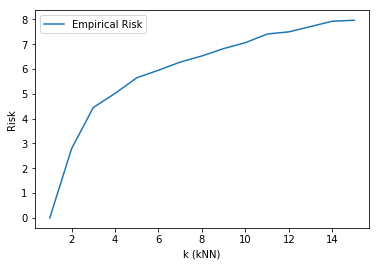

In [42]:
plt.plot(np.arange(1,16),knns_emp,label="Empirical Risk")
plt.xlabel('k (kNN)')
plt.ylabel('Risk')
plt.legend()

<p>Therefore, we choose Leave one out risk.</p>

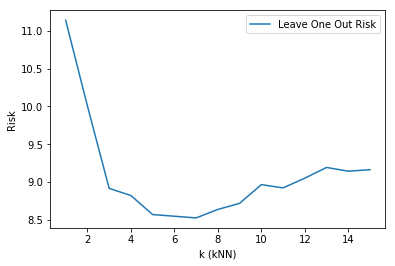

In [43]:
plt.plot(np.arange(1,16),knns_loo,label="Leave One Out Risk")
plt.xlabel('k (kNN)')
plt.ylabel('Risk')
plt.legend()

# 6. SVR

In [63]:
#In this situation, we need to use "x_ols"---the design matrix which is scaled and with intercept column.
#store leave one out risk with different rank r.
svrs_loo=[]
svr = SingularValueRegressor(1)
svr.fit(x_ols,y)
for k in np.arange(1,9):
    svr.change_rank(k)
    risk_svr=risk(svr)
    svrs_loo.append(risk_svr.loo(x_ols,y))

In [64]:
svrs_loo

[574.222809215137,
 18.792645552728228,
 17.443604996183947,
 13.508588882259103,
 13.155617558614754,
 12.735924998241593,
 11.758910213200302,
 11.43946607811117]

<p>
    The first one is huge. This is because the intercept's effect.
</p>

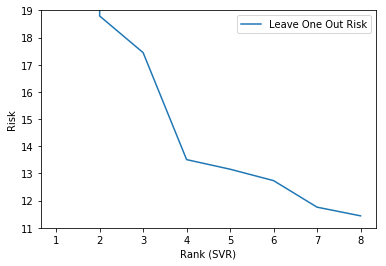

In [65]:
plt.plot(np.arange(1,9),svrs_loo,label="Leave One Out Risk")
plt.xlabel('Rank (SVR)')
plt.ylabel('Risk')
plt.ylim(11,19) #focus on the later 6 points.
plt.legend()

# 7. Comparison

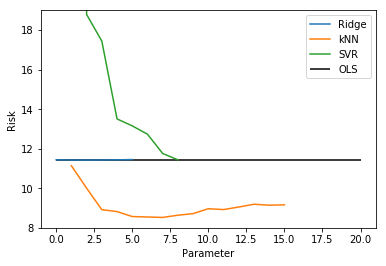

In [66]:
plt.hlines(risk_OLS.loo(x_ols,y),0,20,label="OLS")
plt.plot(np.arange(0,5.1,0.1),ridges_loo,label="Ridge")
plt.plot(np.arange(1,16),knns_loo,label="kNN")
plt.plot(np.arange(1,9),svrs_loo,label="SVR")
plt.xlabel('Parameter')
plt.ylabel('Risk')
plt.ylim(8,19) #focus on the later 6 points.
plt.legend()

<h2>
    The graph suggests that:
</h2>
<ul>
    <li>No matter how much we tune the parameter, Ridge always has no obvious difference with OLS. </li>
    <li>kNN model has the least "leave one out cross validated squared error". When we tune the parameter to 7, it has the least risk.</li>
    <li>SVR has the largest error. No matter how many ranks we choose, the risks are always no less than the OLS. When we choose them all, it is the OLS model.</li>
</ul>
